In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
data = "winequality-red.csv"
df = pd.read_csv(data, sep=';')

In [4]:
print(df.shape)
print(df.info())
display(df.head())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
X_scaled = scale(df)

In [6]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(ddof=0,axis=0))

[ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.73268229e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16  8.88733878e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
df_scaled = pd.DataFrame(X_scaled,columns=df.columns)
display(df_scaled.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

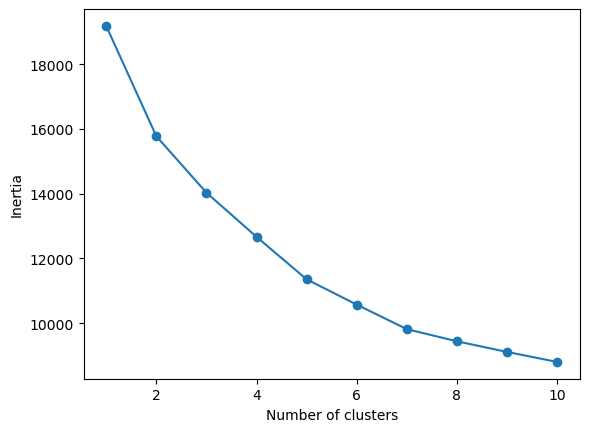

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
n_cls = 4
km = KMeans(n_clusters=n_cls, n_init=10, random_state=5)
cls = km.fit_predict(X_scaled)

c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [10]:
df['cluster_no'] = cls
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_no
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
print(df['cluster_no'].value_counts())

cluster_no
1    703
0    480
2    388
3     28
Name: count, dtype: int64


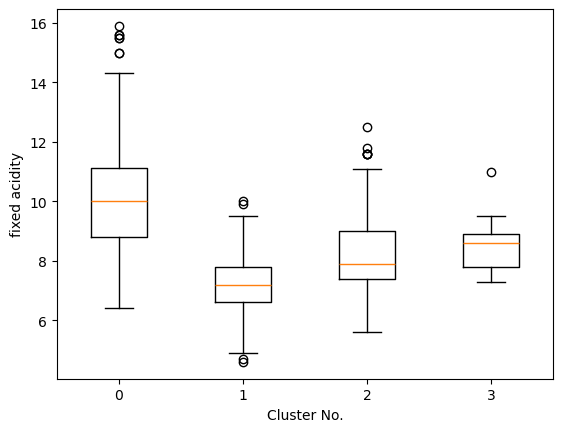

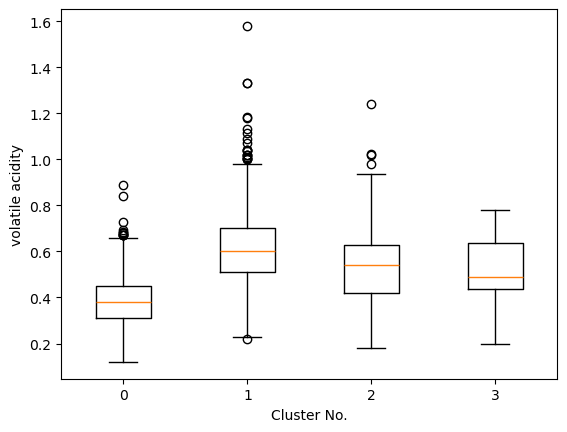

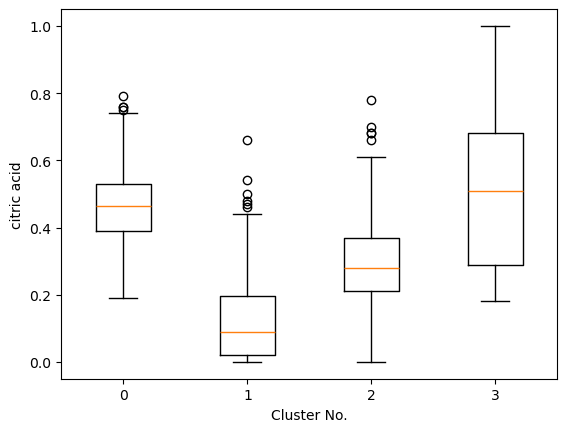

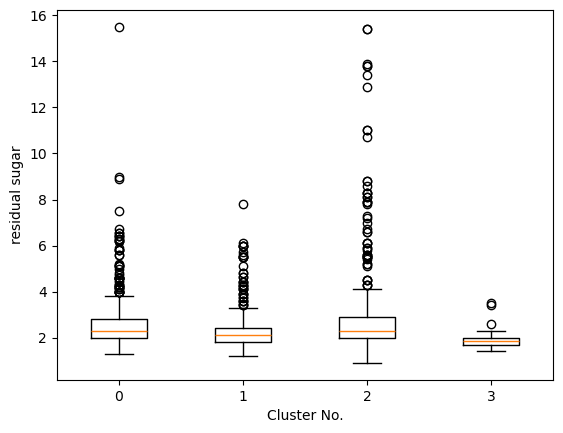

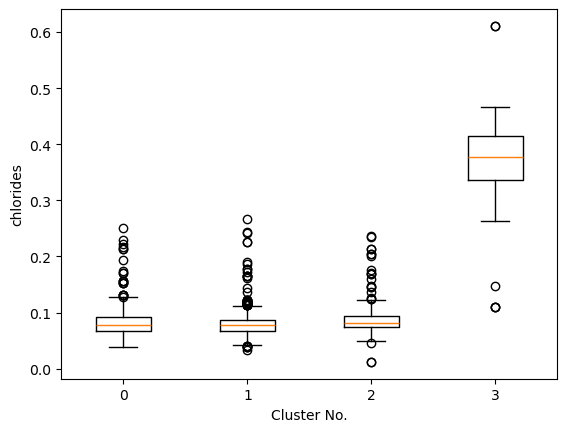

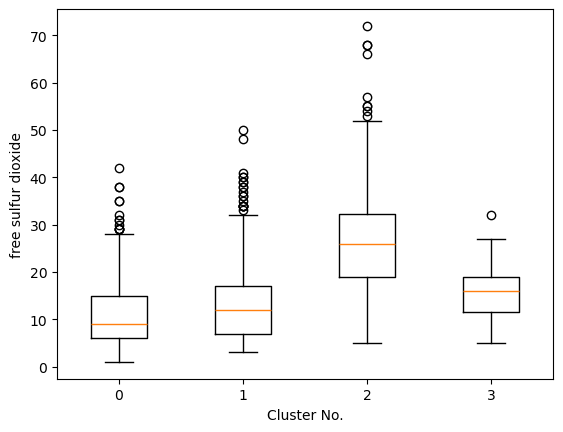

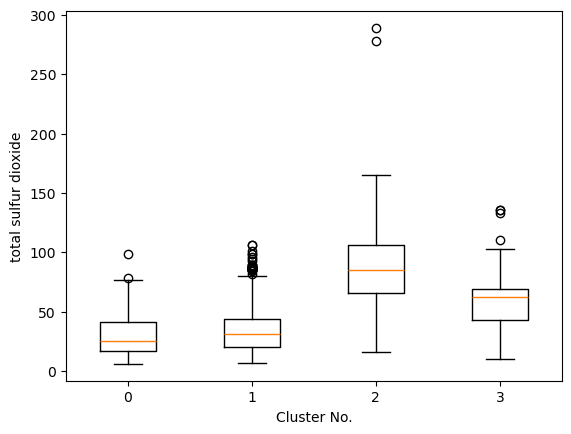

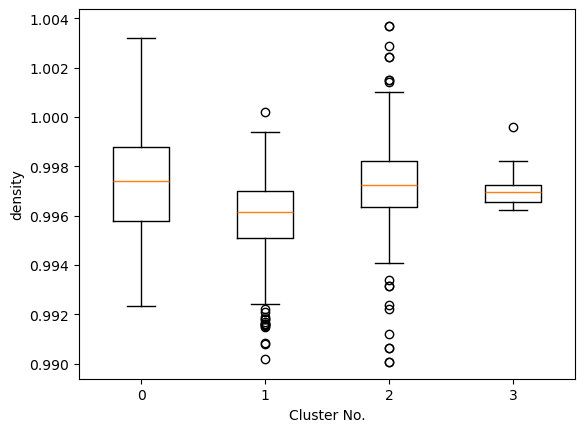

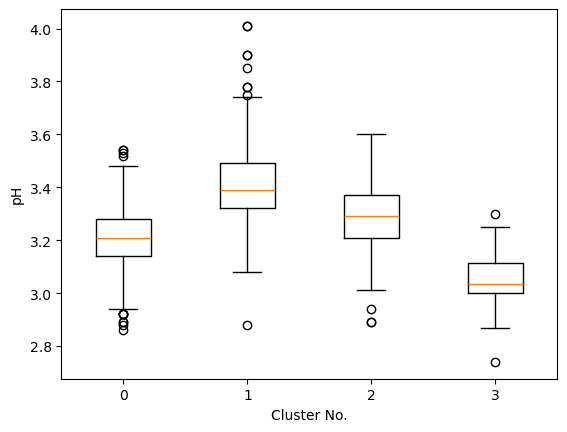

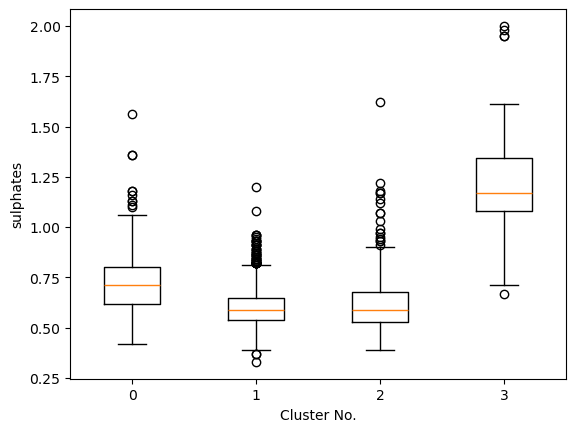

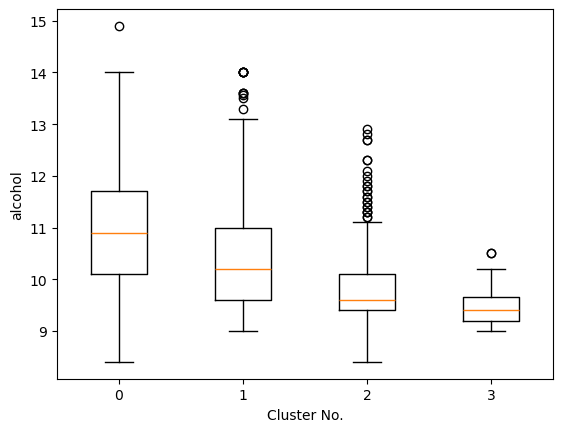

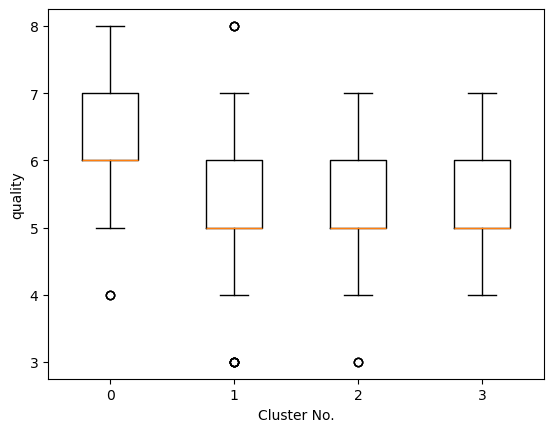

In [12]:
cols = list(df.columns[:-1])
for c in cols:
    dat = []
    for i in range(n_cls):
        df_cls = df[ df['cluster_no']==i ]
        dat.append(df_cls[c])
    plt.boxplot(dat, labels=range(n_cls))
    plt.xlabel('Cluster No.')
    plt.ylabel(c)
    plt.show()

In [13]:
cluster_means = df.groupby('cluster_no').mean()
differences = cluster_means.loc[0] - cluster_means.drop(0).mean()
top_2_columns = differences.abs().nlargest(2).index.tolist()
print("クラスタ番号0が他のクラスタと区別されるのに大きく寄与している列:", top_2_columns)

クラスタ番号0が他のクラスタと区別されるのに大きく寄与している列: ['total sulfur dioxide', 'free sulfur dioxide']
